# Ollama



https://ollama.com/

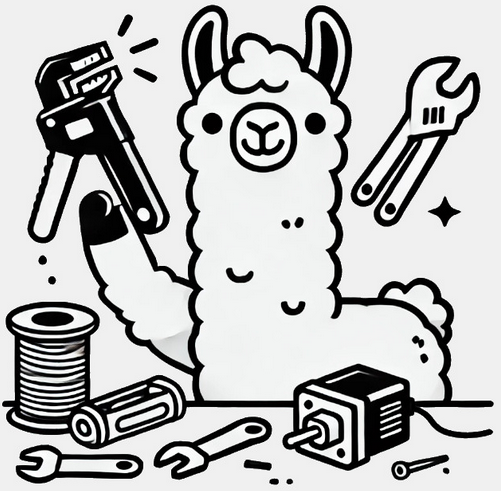

[Ollama es una plataforma de código abierto diseñada para ejecutar grandes modelos de lenguaje localmente.](https://ollama.org/es/)

Es un software que permite gestionar diferentes modelos largos de lenguaje y ponerlos a disposición como un servicio local en un equipo, o exponerlos a una red de la forma en que se desee

# Instalar Ollama

Ollama se puede instalar en [Windows](https://ollama.com/download/OllamaSetup.exe), [Mac](https://ollama.com/download/Ollama.dmg) o Linux ( `curl -fsSL https://ollama.com/install.sh | sh` )

Y cuando se cuenta con el lenguaje de programación **Python**, es muy probable que se tenga acceso a la herramienta **pip**, con la cual se puede también instalar la librería que permite comunicar el lenguaje de python con la herramienta de ollama

In [ ]:
!apt install lshw
!curl -fsSL https://ollama.com/install.sh | sh
!pip install ollama

# Usar un modelo en Ollama

Una vez instalado, para poder usarlo se debe solicitar que descargue un modelo largo de lenguaje, posee varios y pueden consultarse en :

https://ollama.com/search

Un modelo que no requiere mucho espacio de almacenamiento puede ser [DeepSeek-r1](https://ollama.com/library/deepseek-r1) o [Genma3](https://ollama.com/library/gemma3)

Cada uno de los diferentes modelos poseen versiones que permiten utilizarse para diferentes fines, o en diferentes dispostivos con ciertas capacidades, no todos los equipos poseen recursos para procesar grandes bloques de instrucciones como los que poseen los modelos, de tal forma que puedan desempeñarse mas rápido o mas lento dependiendo de los recursos de hardware en el que se implementen los modelos.

Se sugiere probar en laptos algunos modelos diseñados específicamente para hardware modesto, acá se mostrara como utilizar en un equipo que posee recurso de aceleración gráfica, por lo que se puede probar un modelo medianamente modesto.

https://ollama.com/library/gemma3:4b

Gemma es una familia ligera de modelos de Google basada en la tecnología Gemini. Los modelos Gemma 3 son multimodales, procesan texto e imágenes y cuentan con una ventana contextual de 128K con soporte para más de 140 idiomas. Disponibles en tamaños de parámetros 1B, 4B, 12B y 27B, sobresalen en tareas como la respuesta a preguntas, el resumen y el razonamiento, mientras que su diseño compacto permite la implementación en dispositivos con recursos limitados.

Inicialmente se iniciará el servicio de ollama desde instrucciones de pyhton

In [ ]:
import subprocess
import time

# Start the Ollama server and wait for a few seconds to ensure it's ready
subprocess.Popen("ollama serve", shell=True)
time.sleep(5)  # Wait for 5 seconds

Se probará por primera vez el modelo de cuatro billones de parámetros, descargará el modelo y abrirá una terminal interactiva, para salir de la terminal interactiva se debe escribir **/bye**

In [ ]:
!ollama run gemma3:4b

# Usar Python para comunicarse con el servicio

Una buena idea es probar que responda como se espera, y se puede hacer mediante una consulta simple al servicio utilizando las librerías propias en Python

In [ ]:
from ollama import chat
from ollama import ChatResponse
from rich import print
from rich.markdown import Markdown

modelo   = "gemma3:4b"
sistema  = """
Eres un asistente experto en matemáticas,
y das explicaciones a niños de 12 a 16 años de edad,
en oraciones cortas y entendibles,
preferiblemente hasta seis párrafos como máximo
"""
pregunta = "¿Me puedes explicar que es un tensor?"

respuesta: ChatResponse = chat(
    model=modelo,
    messages=[
        {
            'role' : 'system' ,
            'content' : sistema
        },
        {
            'role' : 'user' ,
            'content' : pregunta
        },
    ]
)
print( Markdown( respuesta['message']['content'] ) )

## Creando una función para facilitar el uso desde cualquier parte del código

Para poder interactuar sin digitar tanto parámetro, se puede crear una función que facilite enviar consultas y recibir sus respuestas de una forma menos compleja

In [ ]:
def consultarAlExperto( consulta , historial = "" ) :
  mimodelo   = "gemma3:4b"
  misistema  = """
  Eres un asistente experto en matemáticas,
  y das explicaciones a niños de 12 a 16 años de edad,
  en oraciones cortas y entendibles,
  preferiblemente hasta seis párrafos como máximo
  """
  mirespuesta: ChatResponse = chat(
    model=mimodelo,
    messages=[
      {
          'role' : 'system' ,
          'content' : misistema
      },
      {
          'role' : 'user' ,
          'content' : consulta
      },
    ]
  )
  return mirespuesta['message']['content']

## Creando una interfaz de chat con gradio

Se usará gradio, una librería de python para consturir una interfaz dinámica de chat con la que se puede interactuar mas cómodamente

In [ ]:
import locale
import gradio as gr

locale.getpreferredencoding = lambda: "UTF-8"

michat = gr.ChatInterface(
    consultarAlExperto ,
    type="messages"    ,
    autofocus=False
)

michat.launch( share = True )

Y cuando ya no se use se debe cerrar

In [ ]:
michat.close()